<a href="https://colab.research.google.com/github/MiyerGonzalez/-o-o/blob/master/tutorial_arboles_decision_int_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arbol de Decisión

## <span style="color:green">1. Clasificación</span>

In [ ]:
#Importar los bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
url = "https://raw.githubusercontent.com/jofsanchezci/Datos_Int_IA/main/Comediantes.csv"
df=pd.read_csv(url)

In [ ]:
df
# Go es el veredicto de si será o no será comediante

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [ ]:
#Utiliza el label_encoder para asignar un valor numérico a Nacionalidad y a Go
from sklearn.preprocessing import LabelEncoder

def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

variables = ["Nationality","Go"]

for l in variables:
    label_encoder(l)
#verifica que las variables "Nacionality" y "Go" se cambiaron a valores numéricos
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1
5,44,14,5,1,0
6,66,3,7,0,1
7,35,14,9,1,1
8,52,13,7,0,1
9,35,5,9,0,1


In [ ]:
#Separa en dos partes el dataframe
y = df["Go"]
x = df.drop("Go",axis=1)

In [ ]:
#verifica que se haya hecho la separación
x
y

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64

In [ ]:
#Haz el clasificador de DecisionTree
    #Importa la función
from sklearn.tree import DecisionTreeClassifier
    #Haz el objeto
arbol = DecisionTreeClassifier()
    #Haz el ajuste
arbol.fit(x,y)

DecisionTreeClassifier()

[Text(0.4, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.625, 'Age <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.375, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

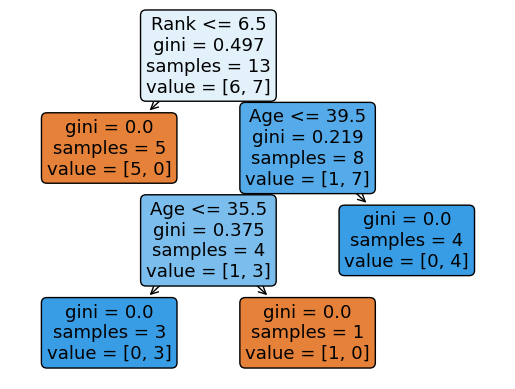

In [ ]:
#Gráfica el árbol de decisión
from sklearn import tree
tree.plot_tree(arbol,feature_names=x.columns,rounded=True,filled=True)

***

##Probabilidades

También permite estimar probabilidades. Lo veremos con un ejemplo:

In [ ]:
#Selecciona una persona aleatoria para estimar su probabilidad y juega con las variables
arbol.predict_proba([[40,6,7,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

El orden de las variables esta como: **Edad, experiencia, rango y nacionalidad**

El resultado esta como : lado izquierdo= No comediante - lado derecho=Comediante

---

## Regresión

Los árboles de decisión tambien pueden hacer regresiones lineales.

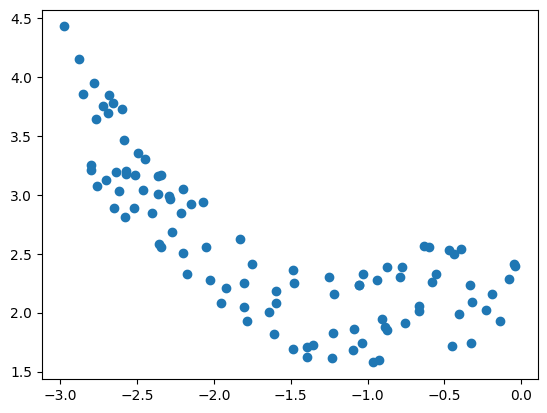

In [ ]:
#Genera 100 número aleatorios y añade un poco de aleatoriedad
m = 100
x = 3 * np.random.rand(m,1) - 3
y = 2 + x + 0.5*x**2 + np.random.rand(m,1)
#np.c_[([x])]
plt.scatter(x,y)

In [ ]:
#Crea un  árbol de decisión con un hiperparametro de 2
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor(max_depth=2)
arbol.fit(x,y)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[0] <= -2.062\nsquared_error = 0.429\nsamples = 100\nvalue = 2.559'),
 Text(0.25, 0.5, 'x[0] <= -2.656\nsquared_error = 0.209\nsamples = 41\nvalue = 3.209'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.154\nsamples = 13\nvalue = 3.674'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.088\nsamples = 28\nvalue = 2.993'),
 Text(0.75, 0.5, 'x[0] <= -0.872\nsquared_error = 0.083\nsamples = 59\nvalue = 2.107'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.082\nsamples = 35\nvalue = 2.028'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.063\nsamples = 24\nvalue = 2.222')]

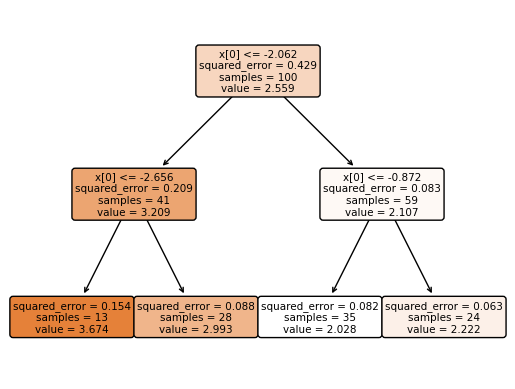

In [ ]:
#Dale formato a tu arbol
tree.plot_tree(arbol,rounded=True,filled=True)

Recuerda que pusimos una profundidad máxima de 2, esto lo decides tu con base a tus objetivos.

KEY: **mse**= Mean Square Error es equivalente al GINI. Te indica el nivel de impureza. **nsamples=** Cantidad de muestras por nodo. **nvalue=** Valor

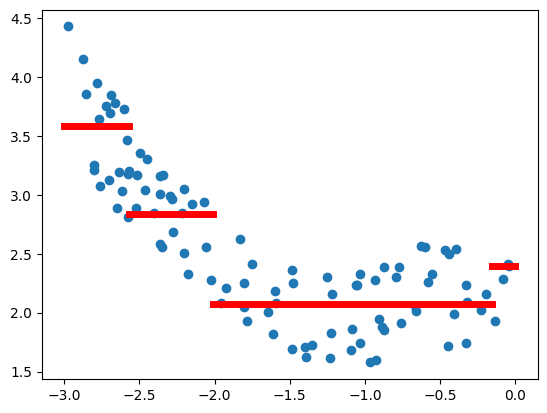

In [ ]:
#Hacer gráfica
x1 = np.linspace(-3,-2.568)
y1 = np.linspace(3.5818,3.5818)
x2 = np.linspace(-2.569,-2.008)
y2 = np.linspace(2.834,2.834)
x3 = np.linspace(-2.009,-0.151)
y3 = np.linspace(2.075,2.075)
x4 = np.linspace(-0.152,0)
y4 = np.linspace(2.392,2.392)
plt.scatter(x,y)
plt.plot(x1,y1,"r-",linewidth=5)
plt.plot(x2,y2,"r-",linewidth=5)
plt.plot(x3,y3,"r-",linewidth=5)
plt.plot(x4,y4,"r-",linewidth=5)

Los nodos se ven representados por cada linea rojo

[Text(0.5, 0.875, 'x[0] <= -2.062\nsquared_error = 0.429\nsamples = 100\nvalue = 2.559'),
 Text(0.25, 0.625, 'x[0] <= -2.656\nsquared_error = 0.209\nsamples = 41\nvalue = 3.209'),
 Text(0.125, 0.375, 'x[0] <= -2.866\nsquared_error = 0.154\nsamples = 13\nvalue = 3.674'),
 Text(0.0625, 0.125, 'squared_error = 0.019\nsamples = 2\nvalue = 4.291'),
 Text(0.1875, 0.125, 'squared_error = 0.097\nsamples = 11\nvalue = 3.562'),
 Text(0.375, 0.375, 'x[0] <= -2.362\nsquared_error = 0.088\nsamples = 28\nvalue = 2.993'),
 Text(0.3125, 0.125, 'squared_error = 0.057\nsamples = 16\nvalue = 3.141'),
 Text(0.4375, 0.125, 'squared_error = 0.061\nsamples = 12\nvalue = 2.795'),
 Text(0.75, 0.625, 'x[0] <= -0.872\nsquared_error = 0.083\nsamples = 59\nvalue = 2.107'),
 Text(0.625, 0.375, 'x[0] <= -1.697\nsquared_error = 0.082\nsamples = 35\nvalue = 2.028'),
 Text(0.5625, 0.125, 'squared_error = 0.048\nsamples = 9\nvalue = 2.268'),
 Text(0.6875, 0.125, 'squared_error = 0.067\nsamples = 26\nvalue = 1.945'),
 Te

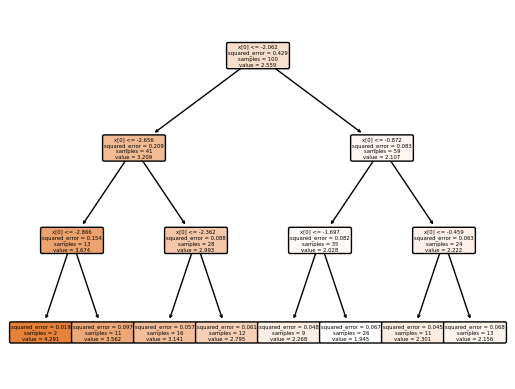

In [ ]:
#Arreglar el sobreajuste poniendo una profundidad máxima mayor a la anterior. Ej: 3.
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor(max_depth=3)
arbol.fit(x,y)
#Gráficalo
tree.plot_tree(arbol,rounded=True,filled=True)
#tree.plot_tree(arbol,rounded=True,filled=True,fontsize=15)Para hacer más grande la letra ajustar fontsize

In [ ]:
#Haz un árbol de decisiones sin restricciones
from sklearn.tree import DecisionTreeRegressor
arbol = DecisionTreeRegressor()
arbol.fit(x,y)

DecisionTreeRegressor()

[Text(0.4274878640776699, 0.9666666666666667, 'x[0] <= -2.062\nsquared_error = 0.429\nsamples = 100\nvalue = 2.559'),
 Text(0.14987864077669902, 0.9, 'x[0] <= -2.656\nsquared_error = 0.209\nsamples = 41\nvalue = 3.209'),
 Text(0.04733009708737864, 0.8333333333333334, 'x[0] <= -2.866\nsquared_error = 0.154\nsamples = 13\nvalue = 3.674'),
 Text(0.019417475728155338, 0.7666666666666667, 'x[0] <= -2.927\nsquared_error = 0.019\nsamples = 2\nvalue = 4.291'),
 Text(0.009708737864077669, 0.7, 'squared_error = 0.0\nsamples = 1\nvalue = 4.429'),
 Text(0.02912621359223301, 0.7, 'squared_error = -0.0\nsamples = 1\nvalue = 4.153'),
 Text(0.07524271844660194, 0.7666666666666667, 'x[0] <= -2.699\nsquared_error = 0.097\nsamples = 11\nvalue = 3.562'),
 Text(0.04854368932038835, 0.7, 'x[0] <= -2.828\nsquared_error = 0.109\nsamples = 8\nvalue = 3.484'),
 Text(0.038834951456310676, 0.6333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 3.856'),
 Text(0.05825242718446602, 0.6333333333333333, 'x[0] 

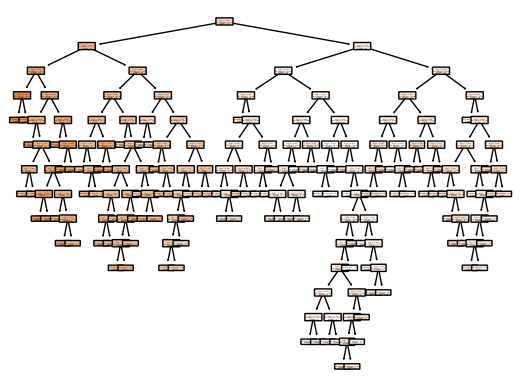

In [ ]:
#Gráficalo y asómbrate
tree.plot_tree(arbol,rounded=True,filled=True)